# 911 Calls Capstone Project

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.pyplot as figure
matplotlib.rcParams['figure.figsize'] = (10,8)

In [5]:

df=pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [2]:
#df.head()

In [7]:
#Top 5 zipcode
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#top 5 townships
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
#the 'title' column, how many unique title codes are there
len(df['title'].unique())

110

In [10]:
# split the title and create new column as reason
df['new']=df['title'].apply(lambda x:x.split(':')[0])    

In [12]:
# most common Reason for a 911 
df['new'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: new, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [11]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Reason')

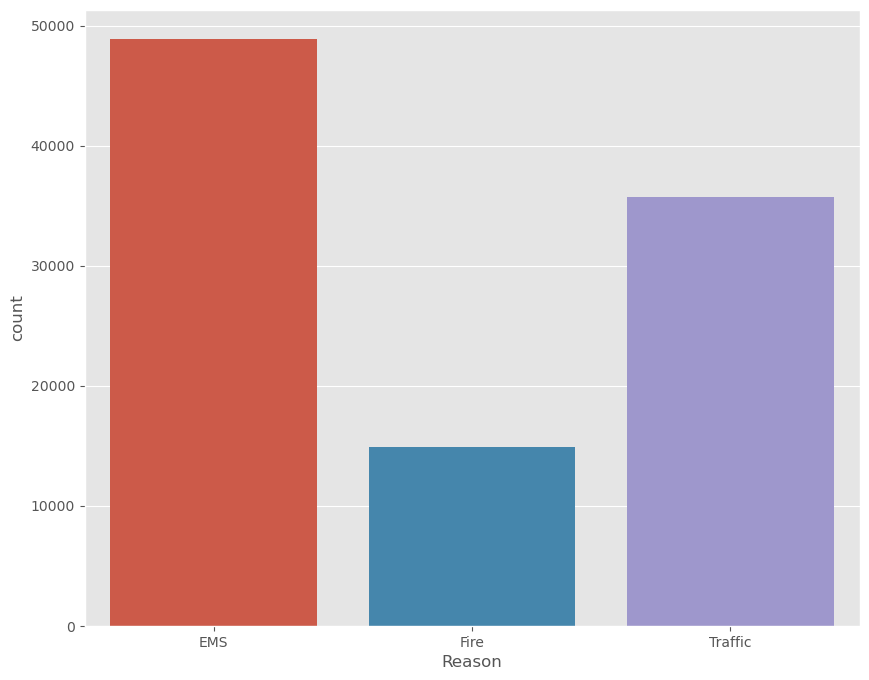

In [22]:
sns.countplot('new',data=df)
plt.xlabel('Reason')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [25]:
# covert the string into datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [27]:
df['Day of Week']=df['timeStamp'].apply(lambda x:x.dayofweek)
    

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
#mapping 
df['Day of Week']=df['Day of Week'].map(dmap)

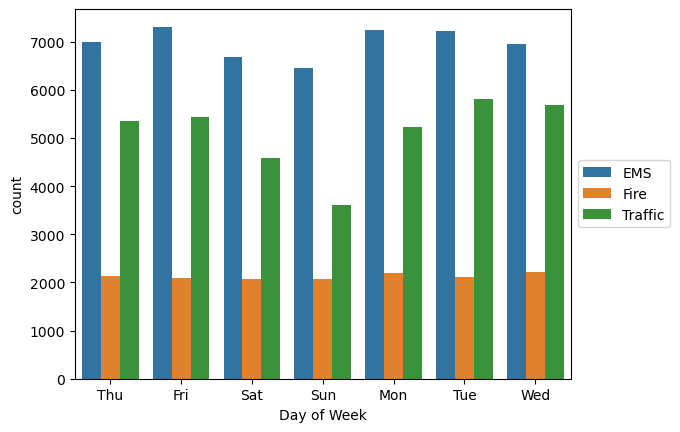

In [72]:
#countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='Day of Week',data=df,hue='new')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

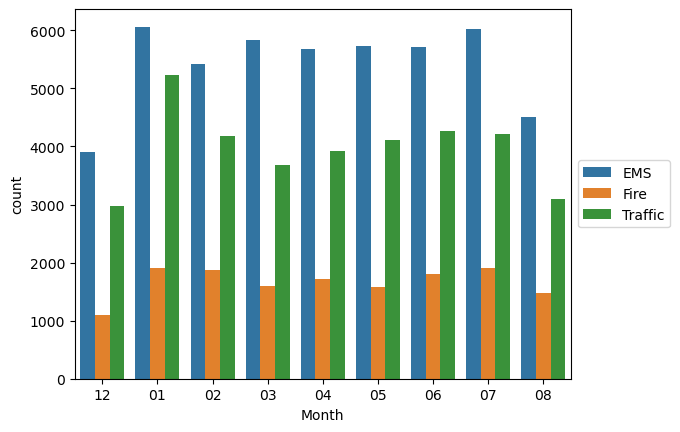

In [76]:
#countplot of the month column with the hue based off of the Reason column
f = plt.figure()
sns.countplot(x='Month',data=df,hue='new',ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [28]:
#gropuby month
byMonth=df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

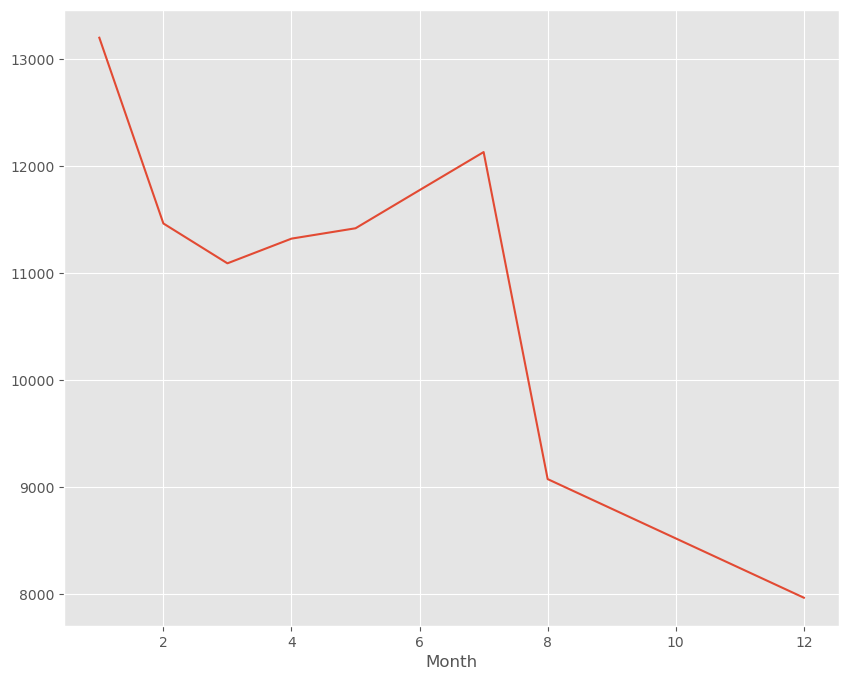

In [29]:
#count of calls per month.
byMonth['twp'].plot(grid=True)

In [49]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,new,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


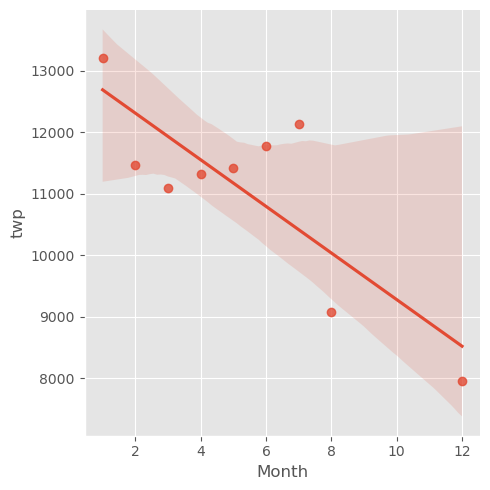

In [30]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index(),)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [40]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [41]:
Bydate=df.groupby('Date').count()
Bydate.reset_index()

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,new,Hour,Month,Day of Week
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
255,2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
256,2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389
257,2016-08-23,439,439,439,390,439,439,439,437,439,439,439,439,439


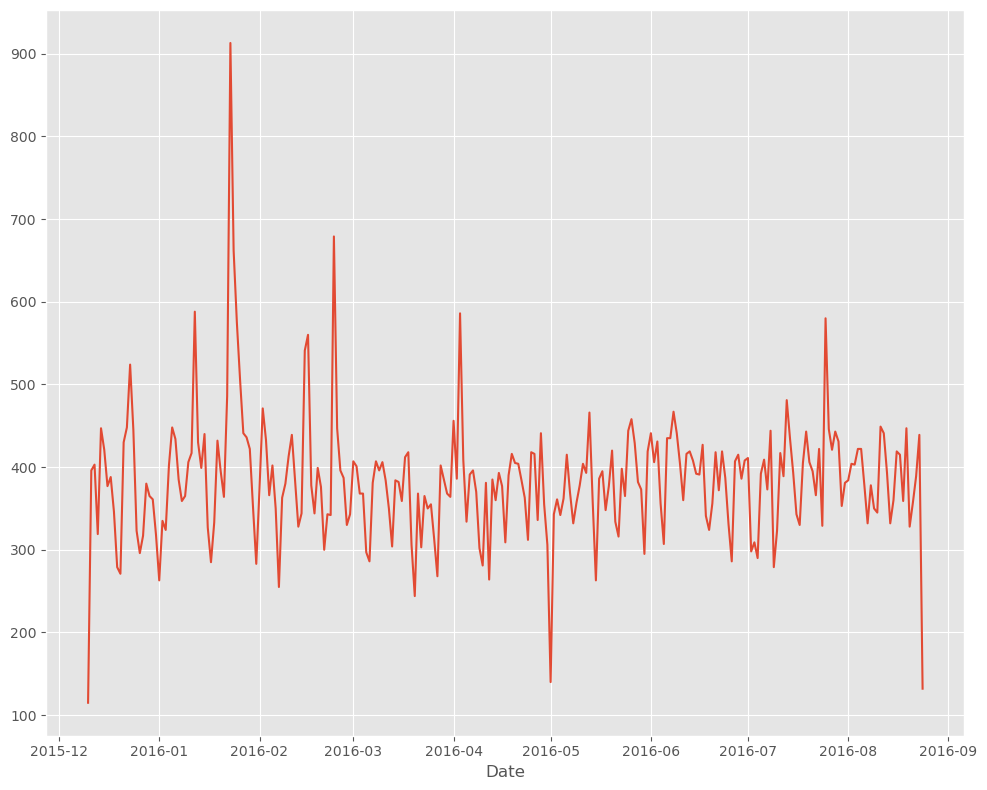

In [42]:
#Date column with the count()

df.groupby('Date').count()['Month'].plot()
plt.tight_layout()



** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

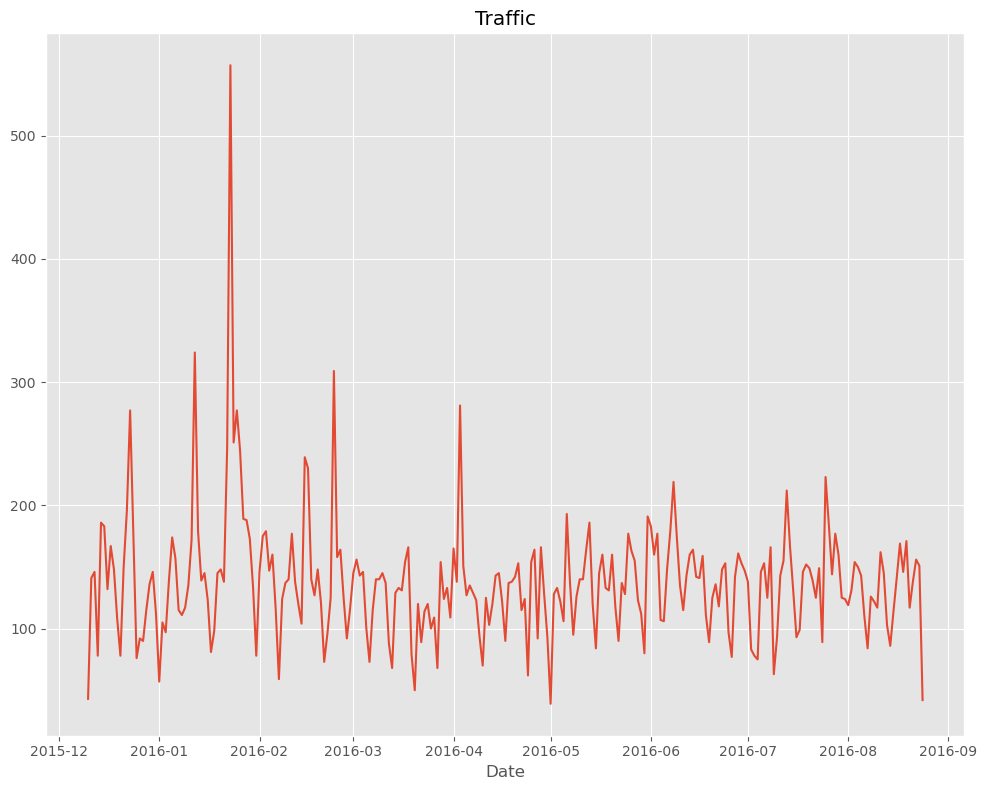

In [43]:
#reason:Traffic with the count()
df[df['new']=='Traffic'].groupby('Date').count()['Month'].plot()
plt.title('Traffic')
plt.tight_layout()

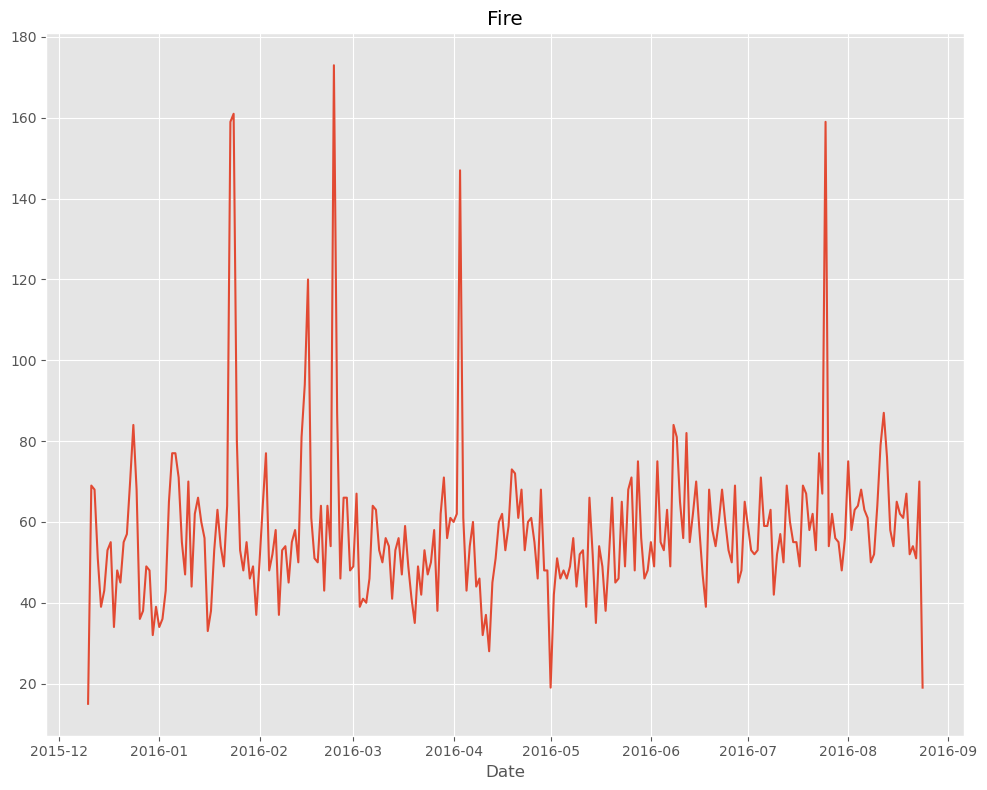

In [44]:
#reason:fire with the count()
df[df['new']=='Fire'].groupby('Date').count()['Month'].plot()
plt.title('Fire')
plt.tight_layout()

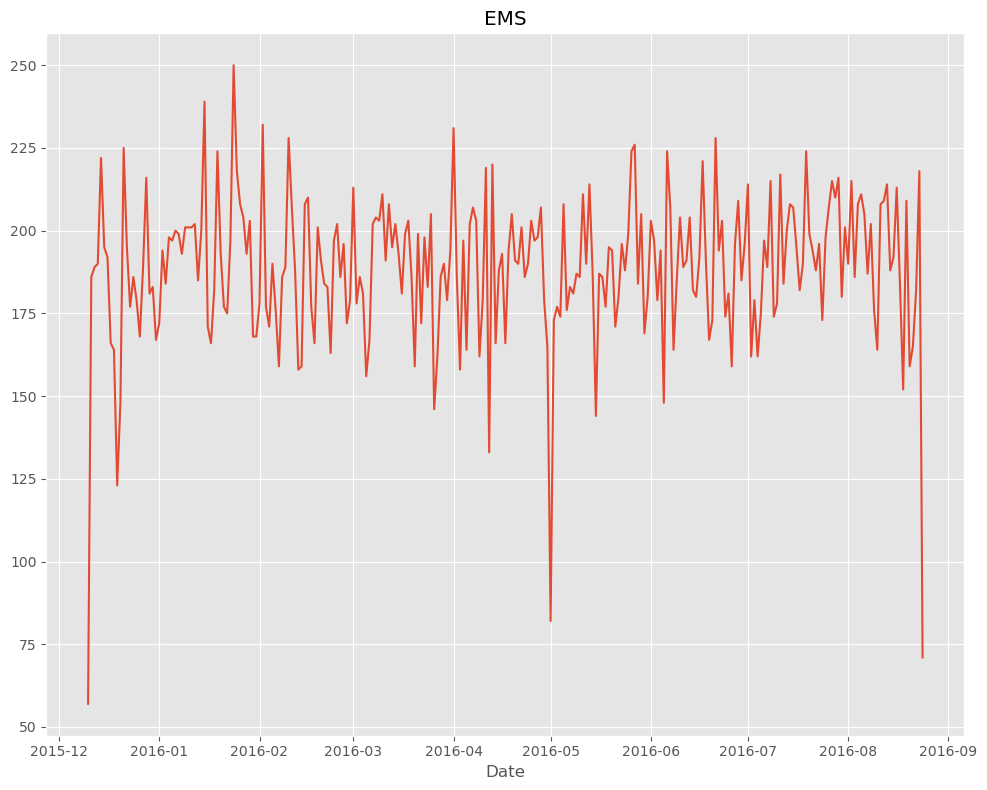

In [45]:
#reason:EMS with the count()
df[df['new']=='EMS'].groupby('Date').count()['Month'].plot()
plt.title('EMS')
plt.tight_layout()

In [46]:
#create pivot table
y=df.pivot_table(index='Day of Week',columns='Hour',aggfunc='count',values='Date')
#df.groupby(['Day of Week','Hour']).count()['new']
#dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [47]:
#create pivot table with column as month
c=df.pivot_table(index='Day of Week',columns='Month',aggfunc='count',values='Date')


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

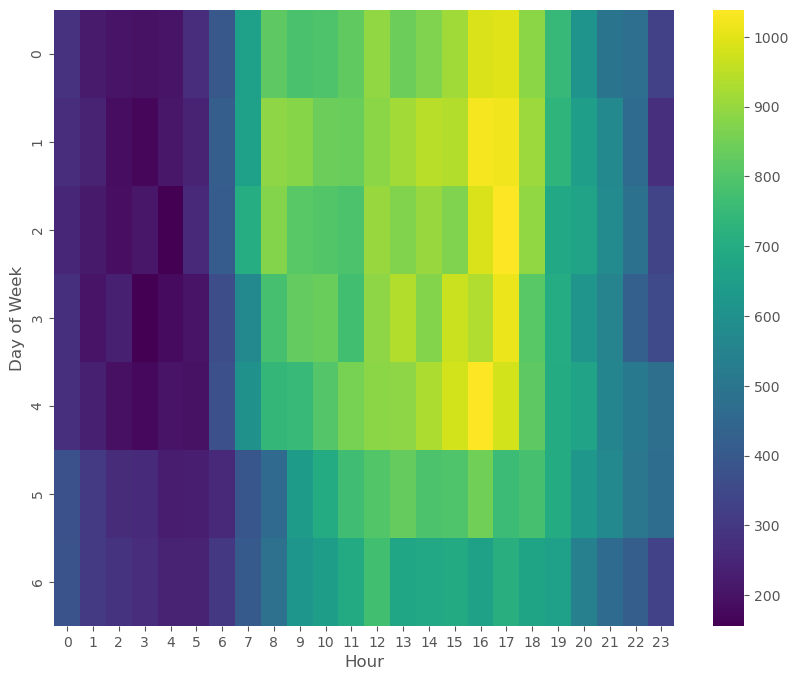

In [49]:
sns.heatmap(y,cmap='viridis')

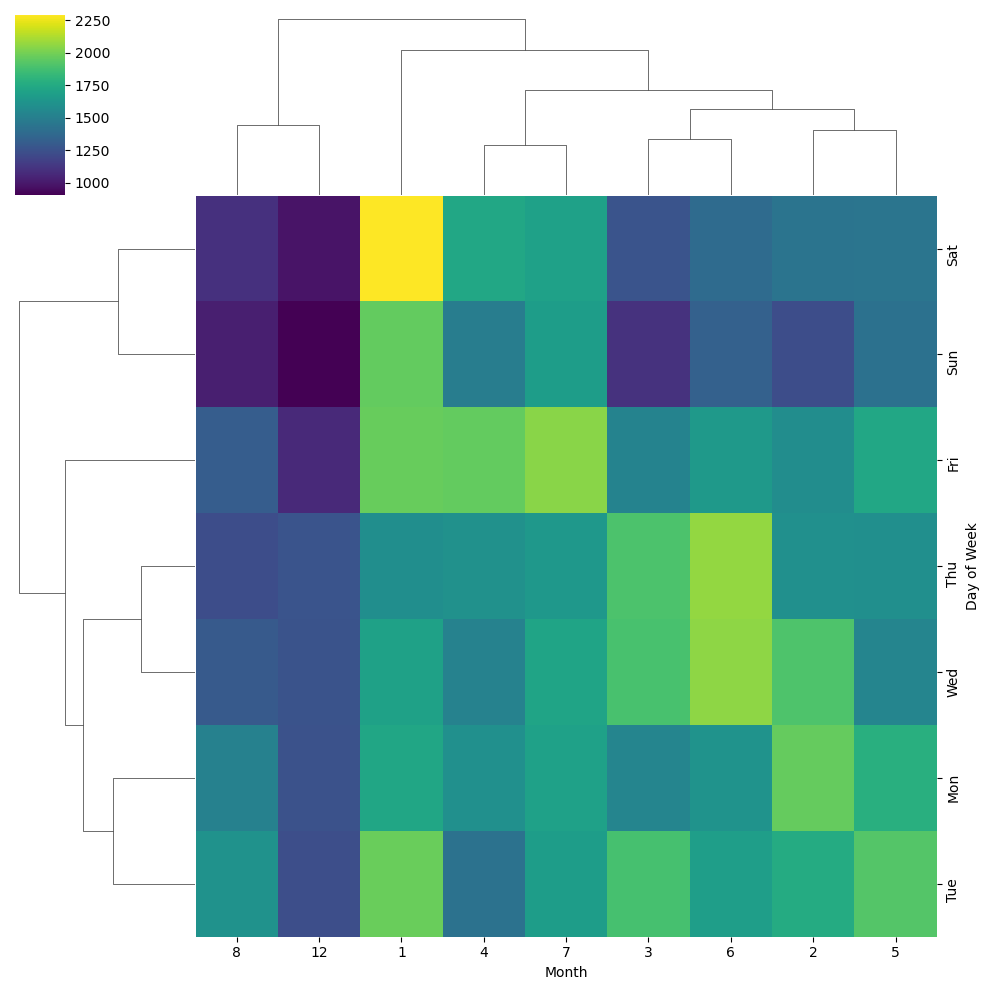

In [125]:
sns.clustermap(c,cmap='viridis')